# Network architecture:

![diagram](https://i.imgur.com/Ky2W2k9.jpg)
<!-- ![diagram](/content/drive/My Drive/weather_forecast/notebooks/diagram.jpg) -->

# Network put together from google drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import sys
sys.path.append('/content/drive/My Drive/weather_forecast/')

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf


import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from random import randrange

TensorFlow 2.x selected.


In [0]:
from src.data.load_data import load_data, create_time_steps, prepare_dataset
from src.models.model import LSTMModel
from src.models.train import train
from src.models.predict import predict

def show_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
            label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
                label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

In [0]:
data, TRAIN_SPLIT = load_data()

In [0]:
look_back = 120  # check last 5 days
prediction = 12  # predict next 12 hours
STEP = 1

x_train, y_train, x_val, y_val = prepare_dataset(data, TRAIN_SPLIT, look_back, prediction, STEP)


In [0]:
lstm_model = LSTMModel(x_train.shape[-2:])

In [18]:
lstm_model = train(lstm_model,x_train,y_train,x_val,y_val,15,200)

Train on 6887 samples, validate on 1620 samples
Epoch 1/15
6800/6887 [============================>.] - ETA: 0s - loss: 0.7390
Epoch 00001: saving model to /content/drive/My Drive/weather_forecast/models/cp.ckpt
6887/6887 [==============================] - 11s 2ms/sample - loss: 0.7359 - val_loss: 0.9385
Epoch 2/15
6800/6887 [============================>.] - ETA: 0s - loss: 0.3926
Epoch 00002: saving model to /content/drive/My Drive/weather_forecast/models/cp.ckpt
6887/6887 [==============================] - 7s 1ms/sample - loss: 0.3915 - val_loss: 0.5155
Epoch 3/15
6800/6887 [============================>.] - ETA: 0s - loss: 0.2158
Epoch 00003: saving model to /content/drive/My Drive/weather_forecast/models/cp.ckpt
6887/6887 [==============================] - 7s 1ms/sample - loss: 0.2151 - val_loss: 0.2697
Epoch 4/15
6800/6887 [============================>.] - ETA: 0s - loss: 0.1369
Epoch 00004: saving model to /content/drive/My Drive/weather_forecast/models/cp.ckpt
6887/6887 [=====

639


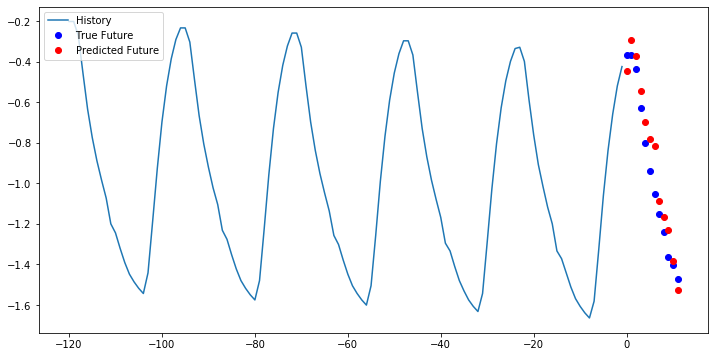

In [20]:
value = randrange(len(x_val))
print(value)
show_plot(x_val[value], y_val[value] , lstm_model.predict(x_val)[value])

In [10]:
latest = tf.train.latest_checkpoint('/content/drive/My Drive/weather_forecast/models')
model = LSTMModel(x_train.shape[-2:])

# Load the previously saved weights
model.load_weights(latest)

576


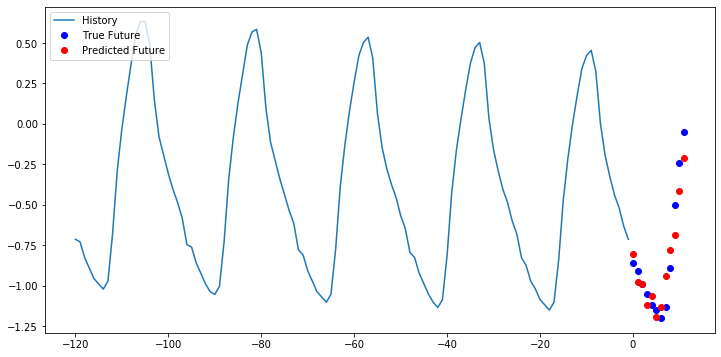

In [11]:
value = randrange(len(x_val))
print(value)
show_plot(x_val[value], y_val[value] , model.predict(x_val)[value])

In [0]:
lstm_model.save_weights('/content/drive/My Drive/saved_models/posledny')



# Restore the weights
# lstm_model.load_weights('./checkpoints/my_checkpoint')
